# Vizualizacija
Izrisani so isti prstni odtisi kot v zvezku '020-fingerprints.ipynb' s podatki iz datoteke 'BBBP.csv'. Dodana sta še avtokodirnik in variacijski avotokodirnik katerih latentni prostor je enak 2. Torej za njiju ni bilo potrebno manjšanje dimenzij.  
Pod grafi so izpisane AUR ROC vrednosti v kombinaciji metod najbližjih sosedov in "leave one out" v enakem vrstnem redu kot so izrisani grafi.

In [9]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, '../code')
import cheauder_utils
from vae_smiles import CustomVariationalLayer

pca_n_comp = 20
tsne_n_com = 2
perp = 30
n_iter = 500
alpha = .3
markersize = 4


vae_encoder_2 = cheauder_utils.load_coder_json(
    "../code/model/encoder_2.json",
    "../code/weights/encoder_2_weights.h5",
    custom_objects={'CustomVariationalLayer': CustomVariationalLayer,
    'latent_dim': 2}
)

ae_encoder_2 = cheauder_utils.load_coder_json(
    "../code/model/ae_encoder_2.json",
    "../code/weights/ae_encoder_2_weights.h5",
    custom_objects={'latent_dim': 2}
)

vae_encoder_196 = cheauder_utils.load_coder_json(
    "../code/model/encoder.json",
    "../code/weights/encoder_weights.h5",
    custom_objects={'CustomVariationalLayer': CustomVariationalLayer,
    'latent_dim': 196}
)

ae_encoder_196 = cheauder_utils.load_coder_json(
    "../code/model/ae_encoder_196.json",
    "../code/weights/ae_encoder_196_weights.h5",
    custom_objects={'latent_dim': 196}
)

smiles, y, label = cheauder_utils.read_data('../data/BBBP.csv', col_smiles=3, col_target=2, delimiter=',')
fps, y, valid = cheauder_utils.smiles_to_fingerprints(smiles, y)
chars,charset = cheauder_utils.load_charset('../code/model/charset_ZINC.json')
oh_sms = cheauder_utils.vectorize_smiles(smiles, charset, 120)

vae2,_,_ = vae_encoder_2.predict(oh_sms)
ae2 = ae_encoder_2.predict(oh_sms)
ae2, vae2 = ae2[valid], vae2[valid]

vae196,_,_ = vae_encoder_196.predict(oh_sms)
ae196 = ae_encoder_196.predict(oh_sms)
ae196, vae196 = ae196[valid], vae196[valid]

legend_labels = {0: 'Ne prehaja', 1: 'Prehaja'}
label = 'Prehod skozi krvno\nmožgansko pregrado'

## TSNE vizualizacije prstnih odtisov in vektorskih vložitev avtokodirnika in variacijskega avtokodirnika s širino latentnega prostora 196 ter vizualizacija 2d latentnega prostora avtokodirnika in variacijskega avtokodirnika

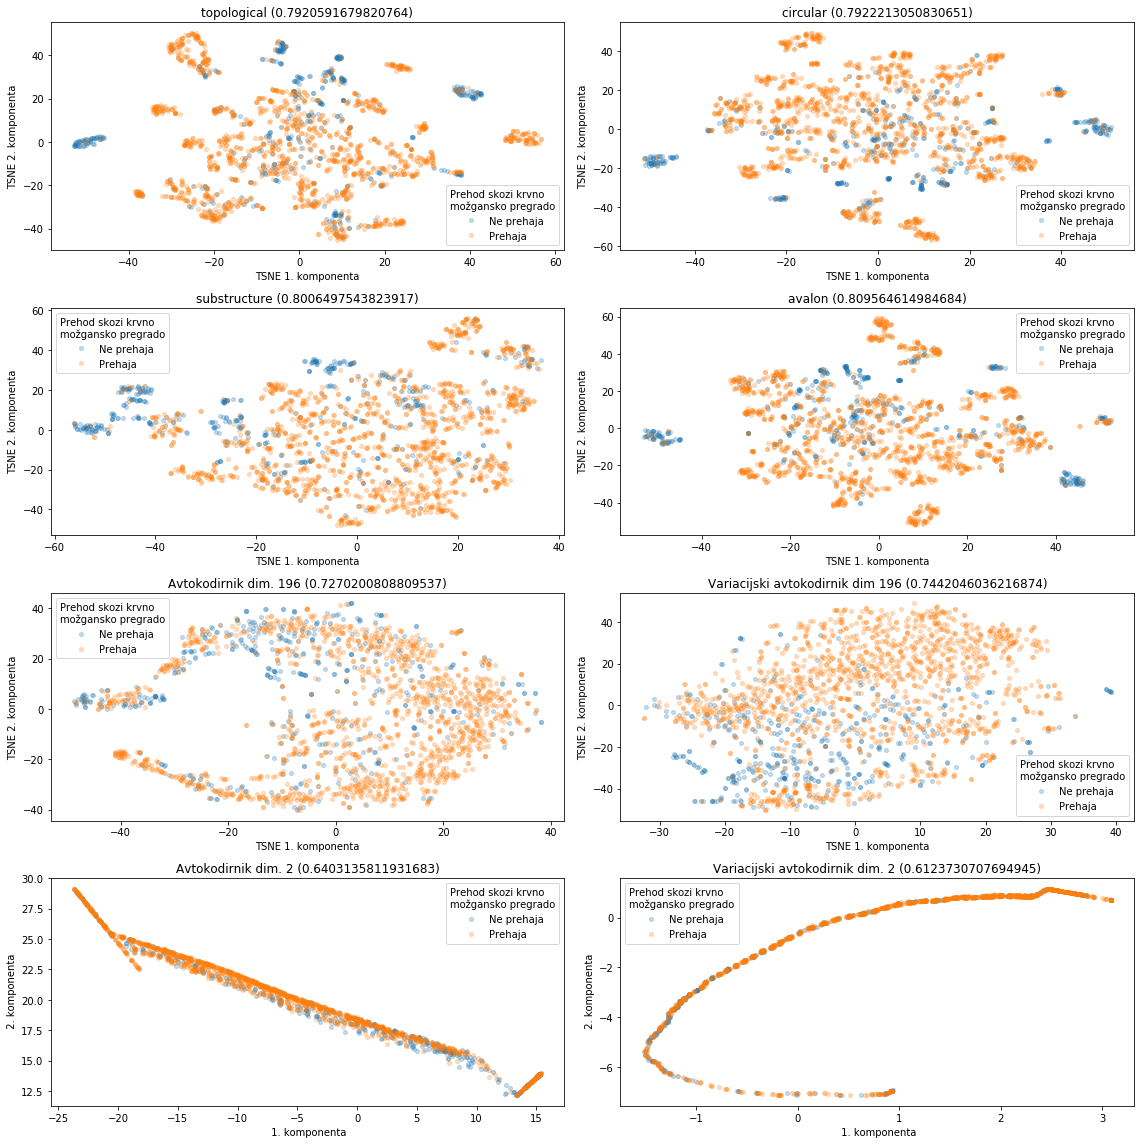

In [10]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, (key, value) in enumerate(fps.items(), 1):
    plt.subplot(4, 2, i)
    cheauder_utils.do_plot('tsne', value, y, plt, key, label, legend_labels, alpha=.25)

for i, (key, value) in enumerate([('Avtokodirnik dim. 196', ae196), ('Variacijski avtokodirnik dim 196', vae196)], 5):
    plt.subplot(4, 2, i)
    cheauder_utils.do_plot('tsne', value, y, plt, key, label, legend_labels, alpha=.25)
    
plt.subplot(4, 2, 7)
t = cheauder_utils.do_plot('', ae, y, plt, 'Avtokodirnik dim. 2', label, legend_labels, alpha=.25)

plt.subplot(4, 2, 8)
t = cheauder_utils.do_plot('', vae, y, plt, 'Variacijski avtokodirnik dim. 2', label, legend_labels, alpha=.25)

plt.tight_layout()
plt.show()

## UMAP vizualizacije prstnih odtisov in vizualizacija 2d latentnega prostora avtokodirnika in variacijskega avtokodirnika

c:\users\repair\miniconda3\envs\mag-env\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components
c:\users\repair\miniconda3\envs\mag-env\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


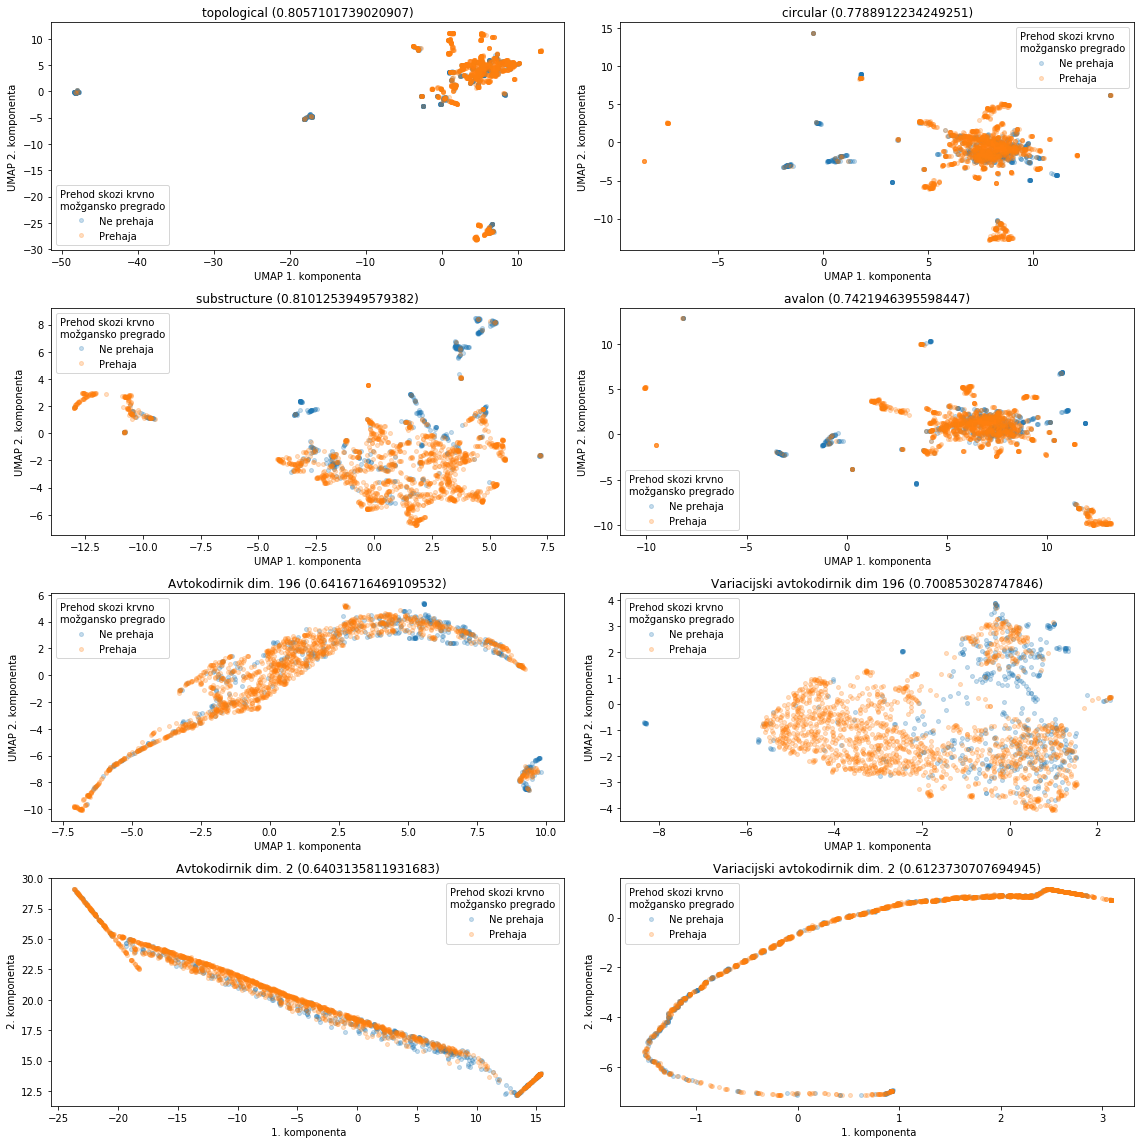

In [11]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, (key, value) in enumerate(fps.items(), 1):
    plt.subplot(4, 2, i)
    cheauder_utils.do_plot('umap', value, y, plt, key, label, legend_labels, alpha=.25)

for i, (key, value) in enumerate([('Avtokodirnik dim. 196', ae196), ('Variacijski avtokodirnik dim 196', vae196)], 5):
    plt.subplot(4, 2, i)
    cheauder_utils.do_plot('umap', value, y, plt, key, label, legend_labels, alpha=.25)
    
plt.subplot(4, 2, 7)
t = cheauder_utils.do_plot('', ae, y, plt, 'Avtokodirnik dim. 2', label, legend_labels, alpha=.25)

plt.subplot(4, 2, 8)
t = cheauder_utils.do_plot('', vae, y, plt, 'Variacijski avtokodirnik dim. 2', label, legend_labels, alpha=.25)

plt.tight_layout()
plt.show()